In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os



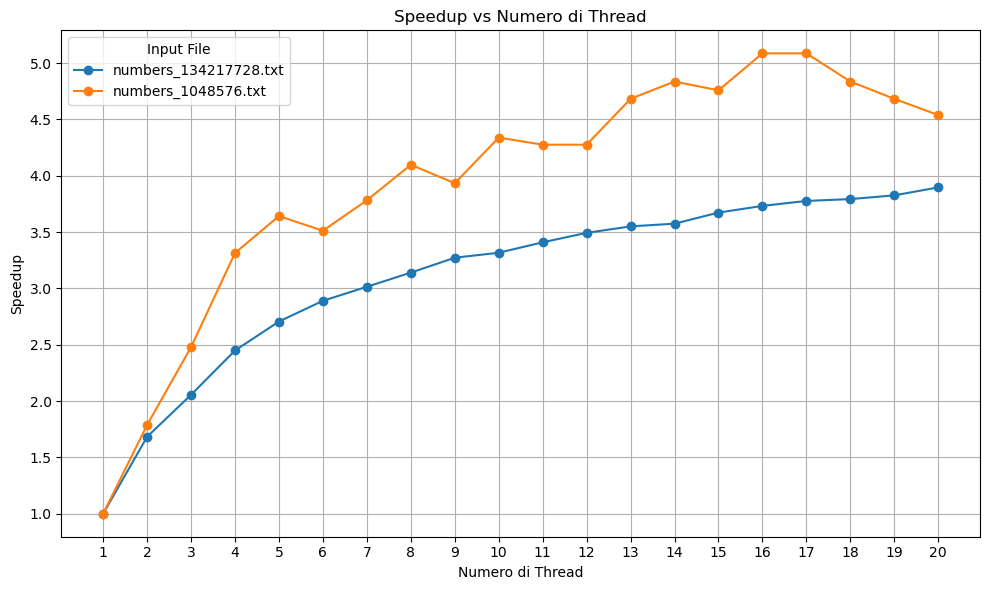

In [2]:
# NO POLAR

# === CONFIG ===
csv_path = "durata_fft.csv"
output_plot = "speedup_plot.png"
output_csv = "speedup.csv"

# === LEGGI CSV ===
df = pd.read_csv(csv_path)
df = df[df["Eseguibile"] == "OMP_FFT.exe"]

# Calcola lo speedup rispetto alla versione con 1 thread per ogni file
speedup_list = []
for file_input in df['File di input'].unique():
    subset = df[df['File di input'] == file_input].copy()
    t1 = subset[subset['Threads'] == 1]["Durata FFT (ms)"].values[0]
    subset['Speedup'] = t1 / subset["Durata FFT (ms)"]
    speedup_list.append(subset)

# Unisci tutti i risultati
speedup_df = pd.concat(speedup_list)

# Salva anche su CSV (opzionale)
speedup_df.to_csv(output_csv, index=False)

# === PLOT ===
plt.figure(figsize=(10, 6))
for file_input in speedup_df['File di input'].unique():
    label = os.path.basename(file_input)  # es. numbers_1000.txt
    subset = speedup_df[speedup_df['File di input'] == file_input]
    plt.plot(subset['Threads'], subset['Speedup'], marker='o', label=label)

plt.title("Speedup vs Numero di Thread")
plt.xlabel("Numero di Thread")
plt.ylabel("Speedup")
plt.legend(title="Input File")
plt.grid(True)
plt.xticks(sorted(speedup_df['Threads'].unique()))
plt.tight_layout()
plt.savefig(output_plot)
plt.show()


C:\Users\noemi\AppData\Local\Temp\ipykernel_3724\3680816887.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Input File")


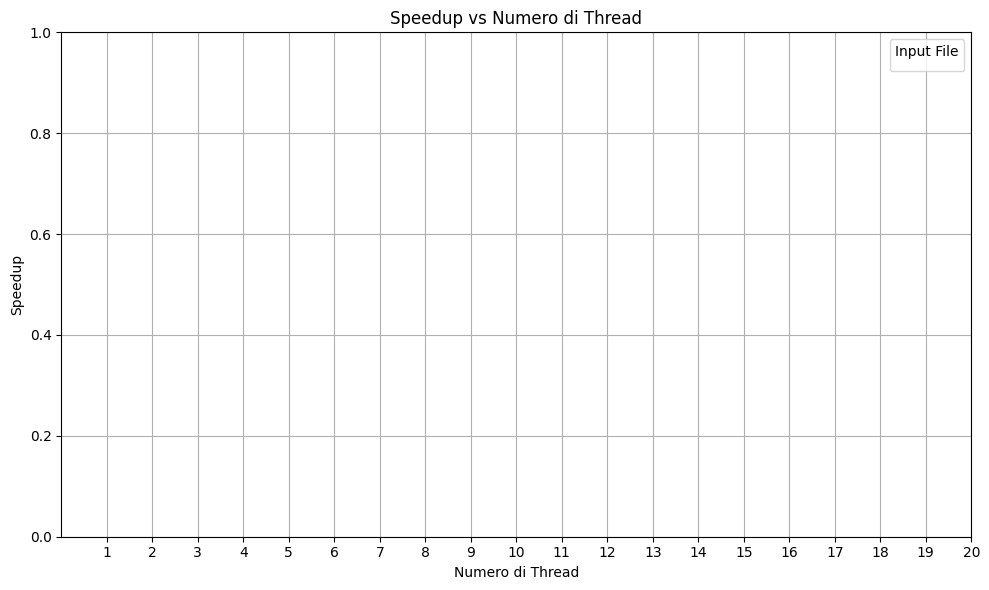

In [ ]:
# POLAR

# === CONFIG ===
csv_path = "medie.csv"
output_plot = "speedup_plot.png"
output_csv = "speedup.csv"

# === LEGGI CSV ===
df = pd.read_csv(csv_path)
df = df[df["Eseguibile"] == "OMP_DFT_polar.exe"]

# Calcola lo speedup rispetto alla versione con 1 thread per ogni file
speedup_list = []
for file_input in df['File di Input'].unique():
    subset = df[df['File di Input'] == file_input].copy()
    t1 = subset[subset['Numero Thread'] == 1]['Media Tempo di Esecuzione (ms)'].values[0]
    subset['Speedup'] = t1 / subset['Media Tempo di Esecuzione (ms)']
    speedup_list.append(subset)

# Unisci tutti i risultati
speedup_df = pd.concat(speedup_list)

# Salva anche su CSV (opzionale)
speedup_df.to_csv(output_csv, index=False)

# === PLOT ===
plt.figure(figsize=(10, 6))
for file_input in speedup_df['File di Input'].unique():
    if file_input != "data/numbers_1024.txt":
        continue
    label = os.path.basename(file_input)  # es. numbers_1000.txt
    subset = speedup_df[speedup_df['File di Input'] == file_input]
    plt.plot(subset['Numero Thread'], subset['Speedup'], marker='o', label=label)

plt.title("Speedup vs Numero di Thread")
plt.xlabel("Numero di Thread")
plt.ylabel("Speedup")
plt.legend(title="Input File")
plt.grid(True)
plt.xticks(sorted(speedup_df['Numero Thread'].unique()))
plt.tight_layout()
plt.savefig(output_plot)
plt.show()
